In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


# UFO reported sightings

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point, Polygon
# !pip install geopandas
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline

## Read data and strip df of spaces

In [3]:
ufo = pd.read_csv('ufo.csv', parse_dates=['date posted'])
ufo.columns = ufo.columns.str.strip()
ufo.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


## Which city reports seeing a UFO the most often?
> SEATTLE!

In [4]:
ufo['city'].mode()

0    seattle
dtype: object

# Which state reports seeing UFO the most often?
> Sunny California

In [5]:
ufo['state'].mode()

0    ca
dtype: object

## What country reports seeing a UFO the most often?
> United States of America

In [6]:
ufo['country'].mode()

0    us
dtype: object

## When was the most reported sightings?
> December 12, 2009

In [7]:
ufo['date posted'].mode()

0   2009-12-12
dtype: datetime64[ns]

## Thoughts:
The map plot shows red dots where people have reported UFO sightings. The US is the most concentrated, as shown heavily in red. 

It appears that in order to escape potential alien kidnappings, you would have to move to Greenland, Russia, or Antarctica.

If you like aliens, move to the US.

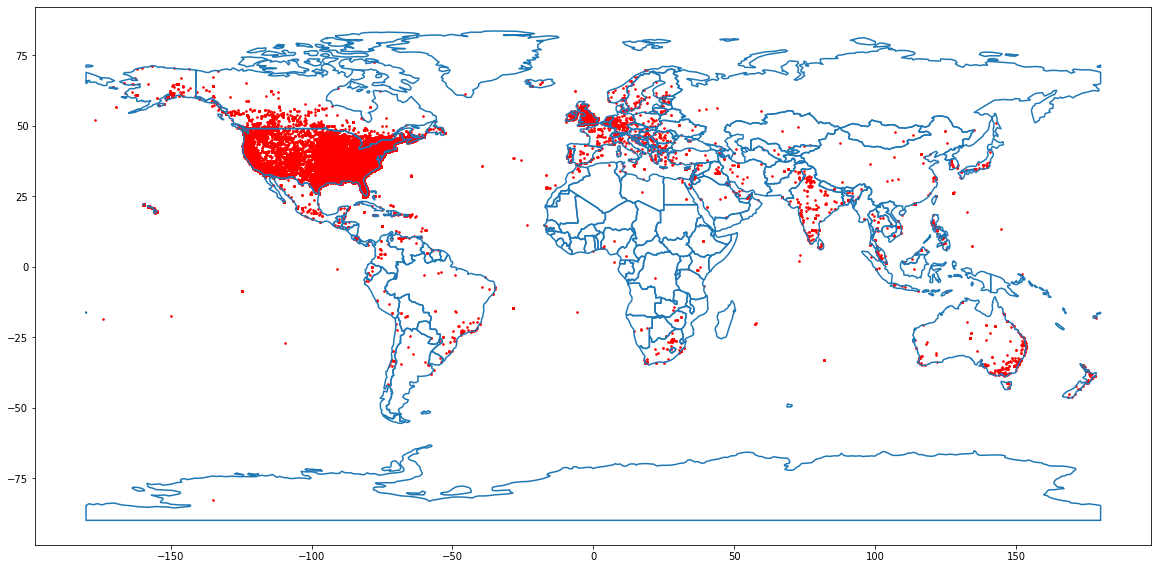

In [8]:
# source: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
geometry = [Point(xy) for xy in zip(ufo['longitude'], ufo['latitude'])]
gdf = GeoDataFrame(ufo, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.boundary.plot(figsize=(20, 12)), marker='.', color='red', markersize=10)